In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.shape

(303, 14)

#### Data Description 
 	 	attribute	 	description	
1.	 	age: 	 	Age in years	
2.	 	sex: 	 	Female or male	
3.	 	cp: 	 	Chest pain type (typical angina, atypical angina, non-angina, or asymptomatic angina)	
4.	 	trestbps: 	 	Resting blood pressure (mm Hg)	c
5.	 	chol: 	 	Serum cholesterol (mg/dl)	
6.	 	fbs:  	Fasting blood sugar (< 120 mg/dl or > 120 mg/dl)	
7.	 	restecg:  	Resting electrocardiography results (normal, ST-T wave abnormality, or left ventricular hypertrophy)	
8.	 	thalach: 	 	Max. heart rate achieved during thalium stress test	
9.	 	exang: 	 	Exercise induced angina (yes or no)	
10.	 	oldpeak: 	 	ST depression induced by exercise relative to rest	
11.	 	slope: 	 	Slope of peak exercise ST segment (upsloping, flat, or downsloping)	
12.	 	ca: 	 	Number of major vessels colored by fluoroscopy	
13.	 	thal: 	 	Thalium stress test result (normal, fixed defect, or reversible defect)	
14.	 	num:  	Heart disease status: number of major vessels with >50% narrowing (0,1,2,3, or 4)	

In [5]:
#Checking number of unique attributes in each column
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
#distributing all the variables in continues & categorical
df_continues_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_categorical_var = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' , 'thal']

In [7]:
#dropping duplicate rows(if any)
df = df.drop_duplicates()

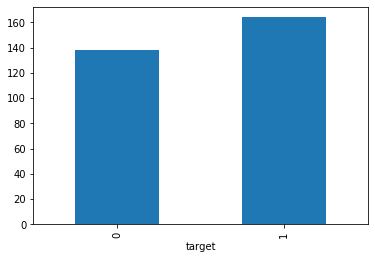

In [8]:
#Observing data distribution of the target variable 
df.groupby('target').size().plot(kind= 'bar')

- Data has distributed 

#### Binning in respect to age

In [9]:
labels = ['26-35', '36-45', '46-55', '56-65', '66+']
bins = [25,36,46,56,66,120]

In [10]:
df['agerange'] = pd.cut(df['age'],bins, labels= labels,include_lowest = True)

In [11]:
#appending the new feature in the category list earlier created
df_categorical_var.append("agerange")

#### Doing crosstab between target variable and other categorical variables 

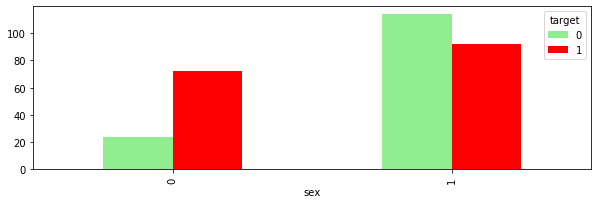

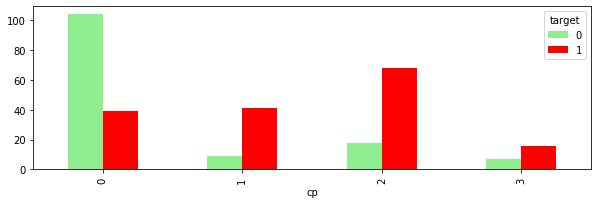

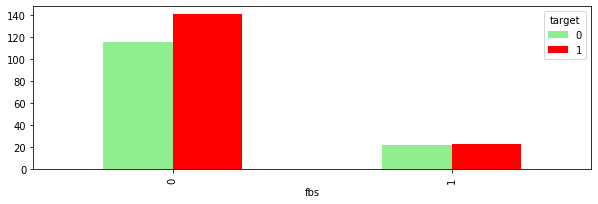

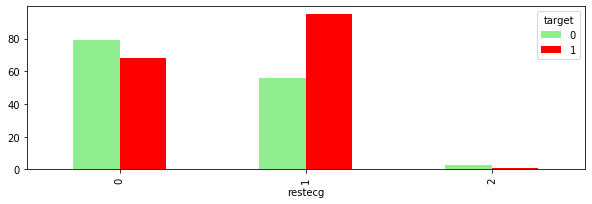

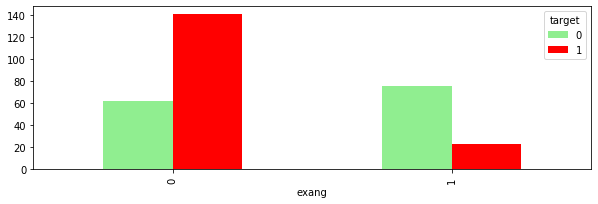

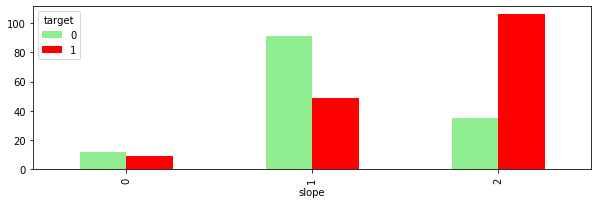

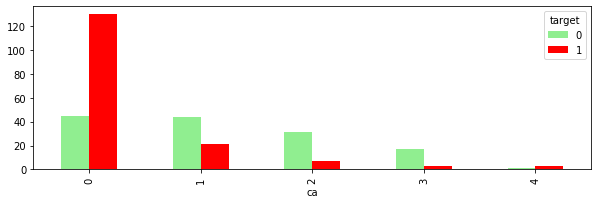

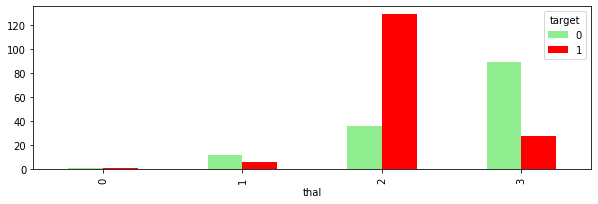

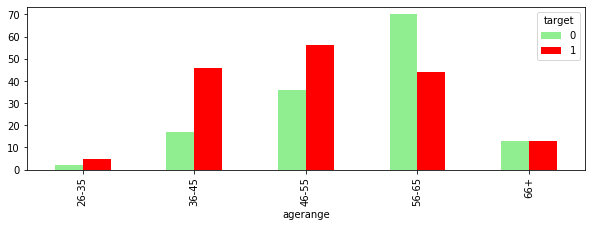

In [12]:
for i in df_categorical_var:
    crosstab = pd.crosstab(index=df[i], columns=df['target'])
    crosstab.plot.bar(figsize=(10,3), color=['lightgreen','red'])
    #print(crosstab, '\n############################')

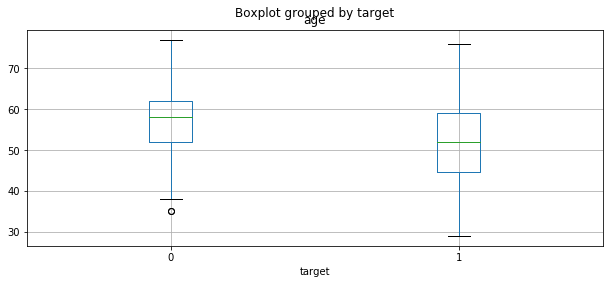

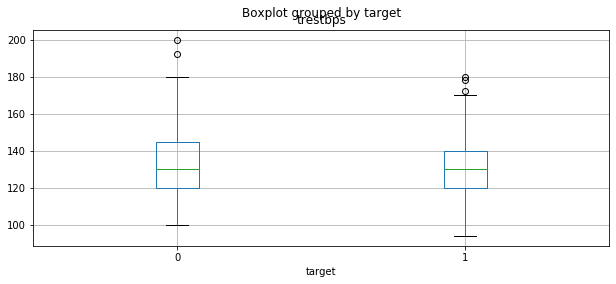

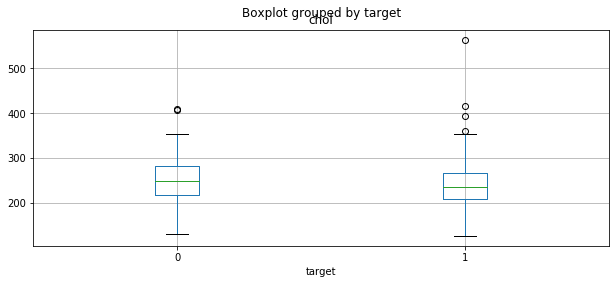

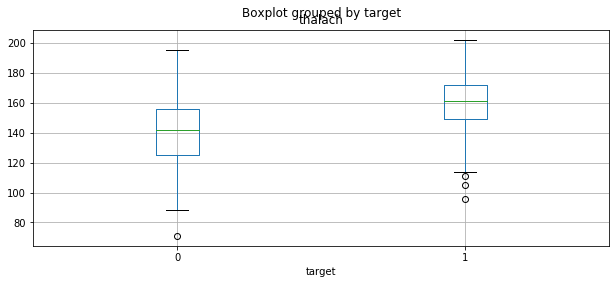

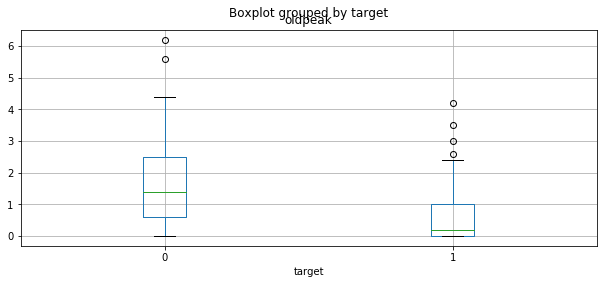

In [13]:
for i in df_continues_var:
    df.boxplot(column=i, by='target',figsize=(10,4), vert=True)

In [18]:
#import seaborn as sns
#get correlations of each features in dataset
#corrmat = df.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agerange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,56-65
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,36-45
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,36-45
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,46-55
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,56-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,56-65
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,36-45
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,66+
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,56-65


## Data Processing 

In [20]:
df = df.drop(['age'], axis = 1)

In [21]:
df

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agerange
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,56-65
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,36-45
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,36-45
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,46-55
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,56-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,140,241,0,1,123,1,0.2,1,0,3,0,56-65
299,1,3,110,264,0,1,132,0,1.2,1,0,3,0,36-45
300,1,0,144,193,1,1,141,0,3.4,1,2,3,0,66+
301,1,0,130,131,0,1,115,1,1.2,1,1,3,0,56-65


In [22]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'agerange'])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [24]:
dataset

,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_4,thal_0,thal_1,thal_2,thal_3,agerange_26-35,agerange_36-45,agerange_46-55,agerange_56-65,agerange_66+
0,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.478910,-0.106449,-1.161988,-0.727060,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
299,-1.232023,0.338703,-0.768384,0.135360,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
300,0.707035,-1.035462,-0.374779,2.032684,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
301,-0.091401,-2.235438,-1.511859,0.135360,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(211, 34)
(211,)
(91, 34)
(91,)


## Model 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

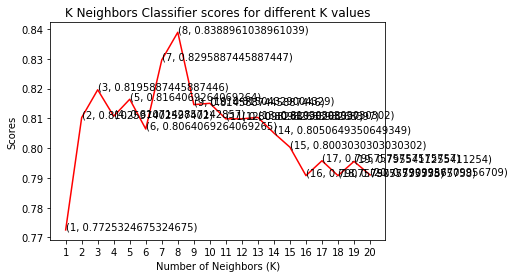

In [33]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [40]:

knn_classifier = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn_classifier,X_test,y_test,cv=10)

In [41]:
score.mean()

0.8563888888888889

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, n_estimators=200,criterion='entropy')

In [44]:
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [45]:
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.86      0.90      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

[[35  7]
 [ 5 44]]


In [49]:
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)



Accuracy of the model: 0.87


In [50]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DTC ,learning_rate=1)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [51]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)


XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.89      0.86      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

[[37  5]
 

In [52]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        42
           1       0.91      0.65      0.76        49

    accuracy                           0.78        91
   macro avg       0.81      0.79      0.78        91
weighted avg       0.81      0.78      0.78        91

[[39  3]
 [17 32]]
Accuracy of the model: 0.78


In [53]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.89      0.86      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

[[37  5]
 [ 7 42]]
Accuracy of the model: 0.87


In [54]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.62      0.93      0.74        42
           1       0.89      0.51      0.65        49

    accuracy                           0.70        91
   macro avg       0.76      0.72      0.70        91
weighted avg       0.77      0.70      0.69        91

[[39  3]
 [24 25]]
Accuracy of the model: 0.69
